# VaR and CVaR by a Parametric Approach (Fisher Expansion)

É Necessário:
   * Média dos retornos
   * Desvio-padrão dos retornos
   * w correspondente na curva normal
    
Fórmula:

### $VaR = Média + Desv.P * w$

## Nessa abordagem é introduzido o cálculo de kurtosis e skewness da curva

## Kurtosis:

<img src="kurtosis.png" width="800" height="300">

## Skewness:

<img src="skewness.png" width="800" height="300">

## w para VaR:

<img src="w_var.png" width="800" height="300">

## w para CVaR:

<img src="w_cvar.png" width="800" height="300">

In [19]:
import scipy.stats as stats
from scipy.stats import skewnorm
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import scipy.stats as st

## Puxando as companhias listadas no Ibovespa

```
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_companies_listed_on_Ibovespa')
tickers = table[0]['Ticker']

for i in range(len(tickers)):
    tickers[i] += '.SA'
    
tickers
```

In [2]:
# Input pelo teclado

#```
tickers = []
x='...'

while(x!='0'):
    x = str(input('Insira as ações para analise: \n'))
    print('Digite 0 para parar')
    if(x!='0'):
        tickers.append(x)
#```

Insira as ações para analise: 
MGLU3.SA
Digite 0 para parar
Insira as ações para analise: 
VALE3.SA
Digite 0 para parar
Insira as ações para analise: 
PETR4.SA
Digite 0 para parar
Insira as ações para analise: 
0
Digite 0 para parar


In [3]:
# Puxando valores históricos das ações a serem analisadas


mydata = pd.DataFrame()

for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2008-4-20')['Adj Close']
    
#mydata.head()

In [4]:
# Fazendo o log-retorno diário das ações analisadas

returns = np.log(mydata / mydata.shift(1))

#returns.head()

In [5]:
# Tirando a média dos valores

media = returns.mean()

round(media.head()*100,2)

MGLU3.SA    0.20
VALE3.SA    0.02
PETR4.SA   -0.00
dtype: float64

In [6]:
# Tirando o desvio padrão dos valores

std_d = np.std(returns, ddof=1)

#std_d

In [7]:
# Definindo intervalo de confianca do V.a.R. ou C.V.a.R.

conf = input('Coloque o intervalo de confianca: \n')
conf = int(conf)
desconf = round((1-conf/int(100)),3)

#desconf

Coloque o intervalo de confianca: 
99


In [8]:
# Pegando o z da curva normal para o intervalo de confiança

z = st.norm.ppf(desconf)

#z

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3F3D2BFC8>,
      dtype=object)

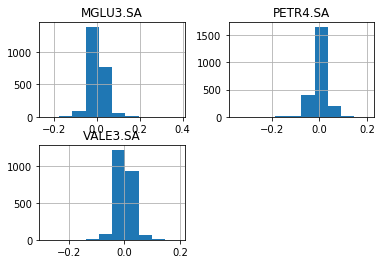

In [9]:
# Pegando a Kurtosis e a Skewness da curva

kurt = returns.kurtosis()-3
skew = returns.skew()

returns.hist()

In [10]:
# Calculando o w(VaR)

w_var = z + (pow(z,2)-1)*(skew/6) + (z)*(pow(z,2)-3)*(kurt/24) - (z)*(2*pow(z,2)-5)*(pow(skew,2)/36)

#w_var

In [11]:
# Caluclando o w(CVaR)

temp = (-0.5)*pow(z,2)

w_cvar = (1/desconf)*(1/np.sqrt(2*np.pi))*(np.exp(temp))*(1 + (z*(skew/6)) + (1-2*pow(z,2))*(pow(skew,2)/36) + (-1+pow(z,2))*(kurt/24))

#w_cvar

In [12]:
# Calculando o V.a.R.

var = media + std_d * w_var

#var

In [13]:
# Calculando o C.V.a.R.

cvar = media + std_d * w_cvar

#cvar

In [14]:
# Transformando V.a.R. em um modo apresentavel

var_str = {}

for t in tickers:
    var_str[t] = str(np.abs(round(var[t]*100,2))) + '%'
    
#var_str

In [15]:
# Transformando C.V.a.R. em um modo apresentavel

cvar_str = {}

for t in tickers:
    cvar_str[t] = str(np.abs(round(cvar[t]*100,2))) + '%'
    
#cvar_str

In [16]:
# Apresentação dos resultados V.a.R.

for t in tickers:
    print("O V.a.R." + "("+ "%s" %conf + ")" + " da ação %s é:" %t, end=' ')
    print(var_str[t])


O V.a.R.(99) da ação MGLU3.SA é: 12.31%
O V.a.R.(99) da ação VALE3.SA é: 10.55%
O V.a.R.(99) da ação PETR4.SA é: 14.76%


In [17]:
# Apresentação dos resultados C.V.a.R.

for t in tickers:
    print("O C.V.a.R." + "("+ "%s" %conf + ")" + " da ação %s é:" %t, end=' ')
    print(cvar_str[t])

O C.V.a.R.(99) da ação MGLU3.SA é: 20.24%
O C.V.a.R.(99) da ação VALE3.SA é: 15.56%
O C.V.a.R.(99) da ação PETR4.SA é: 22.78%


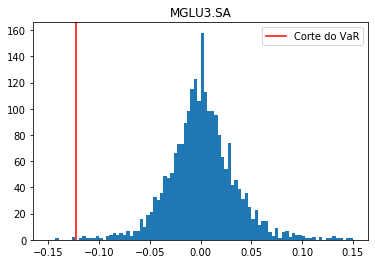

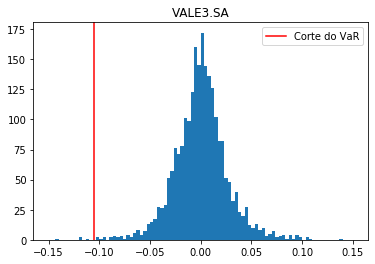

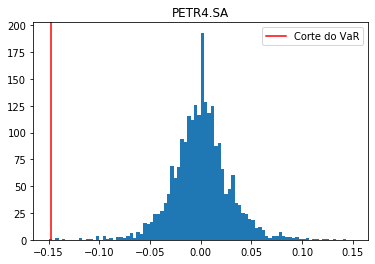

In [18]:
# Representação gráfica do corte do VaR

begin = -0.15
end = 0.15

sep = 90

x=[]

for i in range(int(sep)+1):
    x.append(begin + (i * (end-begin) / sep))
    
for t in tickers:
    plt.hist(returns[t],bins=x)
    plt.axvline(x=var[t],color='red', label='Corte do VaR')
    #plt.axvline(x=0,color='green', label = 'Eixo 0')
    plt.title(t)
    plt.legend()
    plt.show()